In [127]:
import pandas as pd 
import numpy as np
import re
import copy
from datetime import datetime as dt
import matplotlib.pyplot as plt
import copy
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.optimize import curve_fit
%matplotlib inline
import seaborn as sns

In [2]:
#データを読み込みます
dataset = pd.read_table("LD2011_2014.txt", sep =";")

/Users/hiroki.kurasawa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=r

In [3]:
#データセットの中身を表示
dataset.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [4]:
#最初の1000行をCSVファイルで書き出してみる
mydata = dataset.ix[0:1000]
mydata.to_csv("mydata.csv", index=False)

/Users/hiroki.kurasawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [4]:
# 行数と列数を確認
dataset.shape

(140256, 371)

In [6]:
# 列数ごとにデータ型を確認
for col in dataset.columns:
    print(col, type(dataset[col].ix[0]))

Unnamed: 0 <class 'str'>
MT_001 <class 'int'>
MT_002 <class 'int'>
MT_003 <class 'int'>
MT_004 <class 'int'>
MT_005 <class 'int'>
MT_006 <class 'int'>
MT_007 <class 'int'>
MT_008 <class 'int'>
MT_009 <class 'int'>
MT_010 <class 'int'>
MT_011 <class 'int'>
MT_012 <class 'int'>
MT_013 <class 'int'>
MT_014 <class 'int'>
MT_015 <class 'int'>
MT_016 <class 'int'>
MT_017 <class 'int'>
MT_018 <class 'int'>
MT_019 <class 'int'>
MT_020 <class 'int'>
MT_021 <class 'int'>
MT_022 <class 'int'>
MT_023 <class 'int'>
MT_024 <class 'int'>
MT_025 <class 'int'>
MT_026 <class 'int'>
MT_027 <class 'int'>
MT_028 <class 'int'>
MT_029 <class 'int'>
MT_030 <class 'int'>
MT_031 <class 'int'>
MT_032 <class 'int'>
MT_033 <class 'int'>
MT_034 <class 'int'>
MT_035 <class 'int'>
MT_036 <class 'int'>
MT_037 <class 'int'>
MT_038 <class 'int'>
MT_039 <class 'int'>
MT_040 <class 'int'>
MT_041 <class 'int'>
MT_042 <class 'int'>
MT_043 <class 'int'>
MT_044 <class 'int'>
MT_045 <class 'int'>
MT_046 <class 'int'>
MT_047 <c

/Users/hiroki.kurasawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


## データ型の変換

In [5]:
# データ型が一部文字列型になっていることがわかる。
# その理由は、小数点がカンマになっているため。
# str型をfloat型にするために、数値の,を.に変換

dataset = dataset.replace(r",", ".",regex = True)  

#列"Unnamed: 0"の名前を"time"に変更
dataset.rename(columns = {"Unnamed: 0": "time"}, inplace = True)

# time以外は全て小数点型にするので、timeを一度切り離して、float型に変更
data = dataset.drop("time", axis = 1)  # "time"のみ別扱いとする
data = data.astype("float")  # 数値をfloat型へ変換

In [6]:
#kWhに直す(UCIの説明書きにあるように4で割ってkWhに修正 )
data = data/4

# 元のデータが法人顧客データなので、500（これは適当）で割って個人宅レベルの電力量に変換
data = data/500

# 最後にtime列を作成
data["time"] = dataset["time"]

In [10]:
# CSVファイルに書き出す
# data.to_csv("data_converted.csv", index=False)

In [12]:
# 要約統計量を確認
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [27]:
# time列から　月、日、曜日、時を抜き出すために関数を用意

def get_year_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.year
def get_month_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.month
def get_day_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.day
def get_weekday_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.weekday()
def get_hour_from_time(x):
    time_date = dt.strptime(x, "%Y-%m-%d %H:%M:%S")
    return time_date.hour

In [28]:
# 上記で作成した関数をapplyで一括適用
data["year"] = data["time"].apply(get_year_from_time)
data["month"] = data["time"].apply(get_month_from_time)
data["day"] = data["time"].apply(get_day_from_time)
data["weekday"] = data["time"].apply(get_weekday_from_time)
data["hour"] = data["time"].apply(get_hour_from_time)

In [29]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_367,MT_368,MT_369,MT_370,time,year,month,day,weekday,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 00:15:00,2011,1,1,5,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 00:30:00,2011,1,1,5,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 00:45:00,2011,1,1,5,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 01:00:00,2011,1,1,5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2011-01-01 01:15:00,2011,1,1,5,1


In [18]:
# timeの期間
# 開始日と終了日の出力
print('開始日:',data['time'].min())
print('終了日:',data['time'].max())

開始日: 2011-01-01 00:15:00
終了日: 2015-01-01 00:00:00


In [14]:
# 欠損値の確認
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Columns: 375 entries, MT_001 to hour
dtypes: float64(370), int64(4), object(1)
memory usage: 401.3+ MB


In [19]:
# NAを削除しても行列数に変化がないので、欠損（NA）を含んでいないことがわかる
#data.dropna()
data.shape

(140256, 376)

## 欠損値の処理

In [7]:
# 顧客に関するカラムを作成
col_customer = []
col_prefix = "MT_"
for cs in np.arange(1,371):
    # {0:03d}1~3桁の数字を扱うので、2桁までの数字は頭に0を埋める
    col_customer.append(col_prefix+"{0:03d}".format(cs))

starting_time_by_customer = []
for cs in col_customer:
    for i in range(len(data)):
        if data[cs][i]!=0:
            starting_time_by_customer.append(i)
            # breakをすることで初めて0ではなくなる行をだけをappendする
            # MT_001から始めるのでクライアント番号毎に積み上がっていく
            break

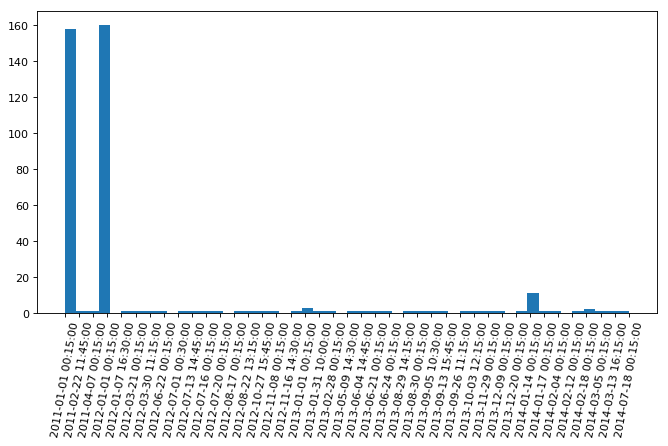

In [8]:
# dataをdata_for_starting_timeにコピーする
data_for_starting_time = copy.copy(data)

# indexを列に加える
data_for_starting_time = data_for_starting_time.reset_index()
# データフレームに変換する
starting_time_by_customer = pd.DataFrame(starting_time_by_customer)
# 列名を"index"に変更する
starting_time_by_customer.rename(columns={0:"index"},inplace=True)
# indexをkeyにしてdata_for_starting_timeとマージする
starting_time_by_customer = pd.merge(starting_time_by_customer,data_for_starting_time[["index","time"]],on="index",how="left")

# 記録が始まる（0が終わる）時間毎のヒストグラムを作成
plt.figure(figsize=(10,5),dpi=80)
plt.hist(starting_time_by_customer["time"],bins=50)
plt.xticks(rotation=80)
plt.show()

- 2012年1月1日から記録が開始されているクライアントも多いので、一律2012年1月1日からのデータを使用する
- 2012年1月1日以降から記録が開始されているクライアントは分析対象外とする
- つまり、starting_timeが2012/1/2以前のクライアントを対象とする

In [19]:
# 2012/1/2以前の行
customer_list_for_analysis = []
for cs in col_customer:
    # クライアン名の左から3つ（"MT_"部分）からの数字をcs_idに代入
    cs_id = int(cs[3:])
    # MT_001から記録開始時間をstarting_timeに代入、一番左の列の番号+1がクライアント名になる（index+1）
    # timeはリスト型へ変更する必要あり
    starting_time = dt.strptime(list(starting_time_by_customer[starting_time_by_customer.index+1==cs_id]["time"])[0],
                                "%Y-%m-%d %H:%M:%S")
    if starting_time < dt(2012,1,2):
        if cs != "MT_223" and cs != "MT_347":
            customer_list_for_analysis.append(cs)

In [20]:
# 分析対象のクライアント数
len(customer_list_for_analysis)

318

In [21]:
customer_list_for_analysis+=["time","month","day","weekday","hour"]

In [22]:
customer_list_for_analysis

['MT_001',
 'MT_002',
 'MT_003',
 'MT_004',
 'MT_005',
 'MT_006',
 'MT_007',
 'MT_008',
 'MT_009',
 'MT_010',
 'MT_011',
 'MT_013',
 'MT_014',
 'MT_016',
 'MT_017',
 'MT_018',
 'MT_019',
 'MT_020',
 'MT_021',
 'MT_022',
 'MT_023',
 'MT_025',
 'MT_026',
 'MT_027',
 'MT_028',
 'MT_029',
 'MT_031',
 'MT_034',
 'MT_035',
 'MT_036',
 'MT_037',
 'MT_038',
 'MT_040',
 'MT_042',
 'MT_043',
 'MT_044',
 'MT_045',
 'MT_046',
 'MT_047',
 'MT_048',
 'MT_049',
 'MT_050',
 'MT_051',
 'MT_052',
 'MT_053',
 'MT_054',
 'MT_055',
 'MT_056',
 'MT_057',
 'MT_058',
 'MT_059',
 'MT_060',
 'MT_061',
 'MT_062',
 'MT_063',
 'MT_064',
 'MT_065',
 'MT_066',
 'MT_067',
 'MT_068',
 'MT_069',
 'MT_070',
 'MT_071',
 'MT_072',
 'MT_073',
 'MT_074',
 'MT_075',
 'MT_076',
 'MT_077',
 'MT_078',
 'MT_079',
 'MT_080',
 'MT_081',
 'MT_082',
 'MT_083',
 'MT_084',
 'MT_085',
 'MT_086',
 'MT_087',
 'MT_088',
 'MT_089',
 'MT_090',
 'MT_091',
 'MT_093',
 'MT_094',
 'MT_095',
 'MT_096',
 'MT_097',
 'MT_098',
 'MT_099',
 'MT_100',

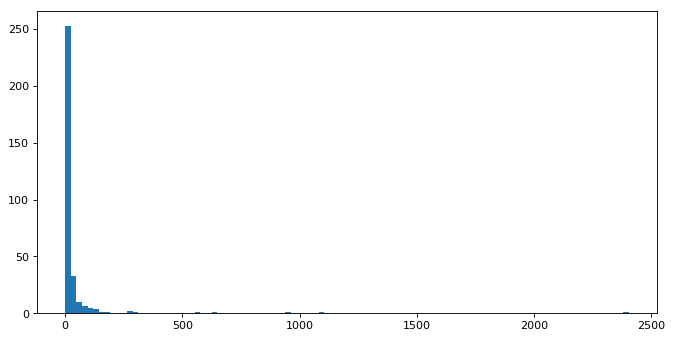

In [30]:
selected_customer_data = copy.copy(data[customer_list_for_analysis])
# 2012/1/1からを対象期間とするので24*4*365=35040行までを削除する
selected_customer_data = selected_customer_data.drop(np.arange(0,35040),axis=0)

# 顧客の1日あたりの平均使用電力を計算
time_list = selected_customer_data["time"]
# 日付のみを抽出（timeの空白を分割）
f = lambda x:x.split(" ")[0]
tmp = time_list.transform(f)
selected_customer_data["day"] = tmp
# day毎に使用電力の和を取る
groupby_day_selected_customer_data = selected_customer_data.groupby(["day"],as_index=False).sum()

plt.figure(figsize=(10,5),dpi=80)
plt.hist(groupby_day_selected_customer_data.mean(),bins=100)
plt.show()

In [31]:
k=0
big_cs =[]
# ilocでクライアントだけの列を抽出（-3で後ろ3行を除く）
for mean_val in groupby_day_selected_customer_data.iloc[:,1:-3].mean():
    if mean_val > 200:
        big_cs.append(groupby_day_selected_customer_data.iloc[:,1:-3].mean().index[k])
    k=k+1

In [32]:
big_cs

['MT_196', 'MT_208', 'MT_228', 'MT_279', 'MT_362']

- 1日の平均使用量が異様に高い上記5世帯は除外する

In [33]:
# 上記5世帯を除く
selected_customer_data = selected_customer_data.drop(big_cs,axis=1)

In [34]:
selected_customer_data.iloc[:,0:-5].shape

(105216, 313)

## 次元圧縮（t-sne）

In [35]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

In [36]:
selected_customer_data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_365,MT_366,MT_367,MT_368,MT_369,time,month,day,weekday,hour
35040,0.001904,0.011380,0.038662,0.068089,0.035366,0.175595,0.004805,0.139731,0.037587,0.043548,...,0.007823,0.006437,0.252414,0.031720,0.380865,2012-01-01 00:15:00,1,2012-01-01,6,0
35041,0.002538,0.011380,0.038662,0.068089,0.036585,0.177083,0.004522,0.139731,0.036713,0.042473,...,0.007823,0.006729,0.262511,0.030050,0.351173,2012-01-01 00:30:00,1,2012-01-01,6,0
35042,0.001904,0.011380,0.038662,0.070122,0.034756,0.174107,0.004240,0.139731,0.037587,0.045699,...,0.007823,0.005266,0.263389,0.028381,0.348240,2012-01-01 00:45:00,1,2012-01-01,6,0
35043,0.001904,0.011380,0.038662,0.070122,0.037805,0.169643,0.003674,0.139731,0.034091,0.044086,...,0.007823,0.007314,0.269974,0.031720,0.346774,2012-01-01 01:00:00,1,2012-01-01,6,1
35044,0.002538,0.011024,0.038662,0.073171,0.036585,0.171131,0.003392,0.132997,0.034965,0.043011,...,0.007823,0.004974,0.278314,0.034224,0.361804,2012-01-01 01:15:00,1,2012-01-01,6,1


In [37]:
# weekday と hourでgroup by
X = selected_customer_data.drop(["time","month","day"],axis=1).groupby(["weekday","hour"],as_index=False)
X = X.mean()

# 各列を正規化する
for i in X.drop(["weekday","hour"],axis=1).columns:
    X[i] = preprocessing.scale(X[i])

# weekdayとhour（7*24=168）の特徴量で転置する
X = X.drop(["weekday","hour"],axis=1).T
X_reduced = TSNE(n_components=2,random_state=0).fit_transform(X)

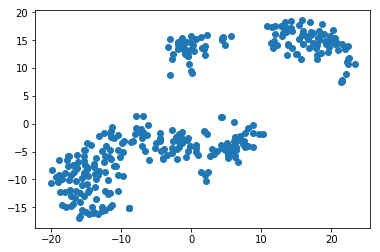

In [38]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])

## エルボーメソッドでクラスタ数を決定

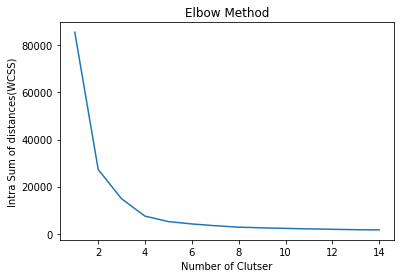

In [39]:
max_cluster = 15
clusters_ = range(1,max_cluster)
intra_sum_of_square_list = []
plt.figure(0)
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(X_reduced)
    # 誤差平方和（inertia_）を格納する
    intra_sum_of_square_list.append(km.inertia_)

fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

## 最適なクラスタ数によるクラスタリング~可視化

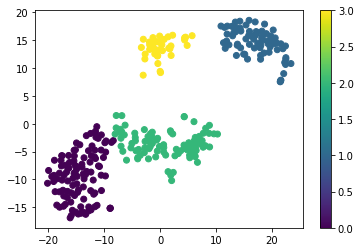

In [41]:
km = KMeans(n_clusters = 4)
km.fit(X_reduced)
pred_4 = km.predict(X_reduced)

plt.scatter(X_reduced[:,0],X_reduced[:,1],c=pred_4)
plt.colorbar()

## クラスタ毎の消費電力の平均と分散を取得

In [70]:
cluster_labels = pred_4
clustered = pd.DataFrame(cluster_labels).T
clustered.columns = (X.T.columns)
clustered.index = (["cluster"])

clustered_data = pd.concat([selected_customer_data.drop(["time","day","hour"],axis=1).\
                            groupby(["month","weekday"],as_index=False).mean()*24*4,clustered])
clustered_data[["month","weekday"]] = clustered_data[["month","weekday"]]/96

clustered_data.T.groupby("cluster",as_index=False).count()

# クラスター毎の平均
print("平均\n",clustered_data.T.groupby("cluster",as_index=False).mean().drop("cluster",axis=1).T.mean())
#クラスター毎の分散
print("分散\n",clustered_data.T.groupby("cluster",as_index=False).std().drop("cluster",axis=1).T.mean())

平均
 0    14.041746
1     6.137242
2    29.607943
3    16.452529
dtype: float64
分散
 0    21.209035
1    11.769275
2    34.851073
3    31.911797
dtype: float64


## 非線形回帰

In [76]:
m_w_h_data = selected_customer_data.drop(["time","day"],axis=1).groupby(["weekday","hour"],as_index=False).mean()*4
m_w_h_data = pd.concat([m_w_h_data,clustered])

In [86]:
m_w_h_data["MT_001"]["cluster"]

3.0

In [90]:
# クラスタの番号によってデータフレームを作成する関数
def cluster_choice(m_w_h_data,cluster_num):
    cluster_X_list = []
    for cs in  m_w_h_data.drop(["hour","month","weekday"],axis=1).columns:
        if m_w_h_data[cs]["cluster"] == cluster_num:
            cluster_X_list.append(cs)
    cluster_X = pd.DataFrame(m_w_h_data[cluster_X_list])
    # ここで4で割る意味は？
    cluster_X["hour"] = m_w_h_data["hour"]/4
    cluster_X["month"] = m_w_h_data["month"]/4
    cluster_X["weekday"] = m_w_h_data["weekday"]/4
    return cluster_X

In [121]:
def nonlinear_fit(x,a,b,c,d,e):
    return a*x+b*x**2+c*x**3+d*x**4+e

In [125]:
def params_all_fit(cluster_X,set_type):
    cluster_X.drop("cluster",axis=0,inplace=True)
    split = 12
    if set_type == "all":
        X = cluster_X.drop(["hours","month","weekday"],axis=1)
        length = 168 # 特徴量の数?
    if set_type == "month":
        X = cluster_X.groupby("month",as_index=False).mean().drop(["hour","weekday","month"],axis=1)
        length = 12
    if set_type == "weekday":
        X = cluster_X.groupby("weekday",as_index=False).mean().drop(["hour","weekday","month"],axis=1)
        length = 7
        split = 7
    if set_type == "hour":
        X = cluster_X.groupby("hour",as_index=False).mean().drop(["hour","weekday","month"],axis=1)
        length = 24
    else:
        print("エラー")
    
     # 多項式がy = a*x+b*x**2+c*X**3+d*x**4+eなので各クライアントの係数を代入する用のデータフレームを用意する
    df_fit = pd.DataFrame(np.zeros([int(length/split*5),len(X.columns)]),columns=X.columns)
    # 正規化を行う
    for i in X.columns:
        X[i] = preprocessing.scale(X[i])
     
    # array_xとarray_yの用途と意味
    for cs in X.columns:
        ix = 0
        params = []
        for i in range(int(length/split)):
            array_x = np.arange(ix,ix+split)
            # XのCS列の[ix:ix+split]行まで
            array_y = X[cs][ix:ix+split]
            param,cov = curve_fit(nonlinear_fit,array_x,array_y)
            params.extend(param)
            ix = ix+split
        df_fit[cs] = params
    return df_fit , length

In [135]:
def plot_fitted(df_fit,length,ci_type):
    df_y = pd.DataFrame()
    for cs in df_fit.columns:
        array_x = np.arange(0,length)
        list_y = []
        i = 0
        count = 0
        for num in array_x:
            list_y.append(df_fit[cs][i]*num+df_fit[cs][i+1]*num**2+df_fit[cs][i+2]*num**3+df_fit[cs][i+3]*num**4+df_fit[cs][i+4])
            count +=1
            if count % 12 ==0:
                i = i+5
        df_y[cs]=list_y
    plt.figure()
    sns.tsplot(np.array(df_y[df_fit.columns]).T,ci=ci_type)
    sns.tsplot(np.zeros(length),color="Red",linewidth=1)
    df_y[df_fit.columns].T.mean()
    meaned_y1 = df_y[df_fit.columns].T.mean()

エラー


/Users/hiroki.kurasawa/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


エラー
エラー
エラー


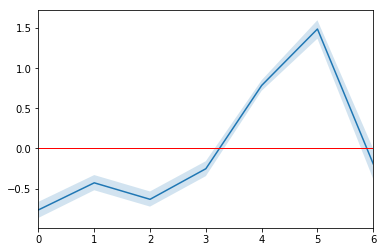

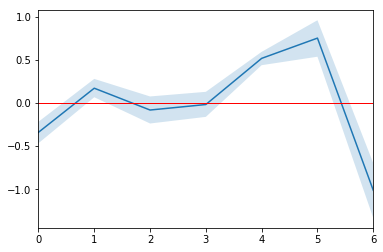

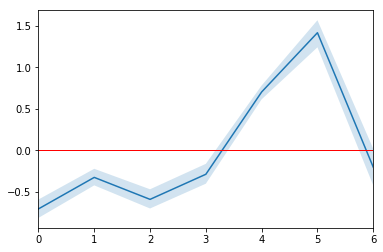

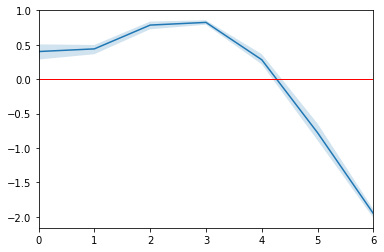

In [140]:
for i in range(4):
    cluster_X = cluster_choice(m_w_h_data,i)
    df_param,length = params_all_fit(cluster_X,"weekday")
    plot_fitted(df_param,length,95)
    name = "plot_weekday"
    number = "{0:01d}".format(i+1)
    name += number
    name+= ".png"

### クラスタ毎の週での消費電力状況

- クラスタ1
    - 金曜日 / 土曜日に消費電力が上昇する
    - 平日に仕事がある一般家庭のクラスタなのではないか。
    
- クラスタ2
    - クラスタ1と同様に土曜日に消費電力が上昇する。また日曜日のみ極端に消費電力が少なくなる。
     
- クラスタ3
    - クラスタ1とほぼ同様のサイクルで電力が消費されている
         
- クラスタ4
    - 平日に多く電力が消費されている
    - 平日に在宅している人が多いクラスタなのではないか

/Users/hiroki.kurasawa/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


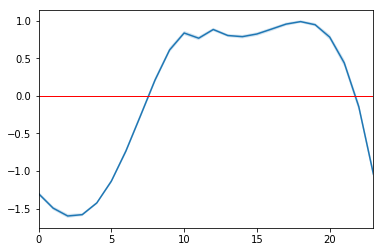

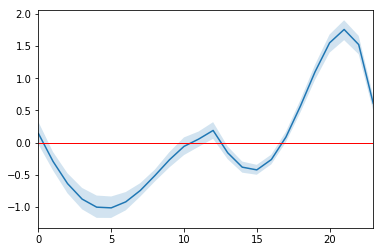

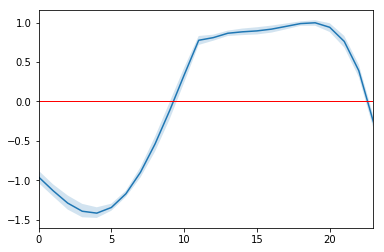

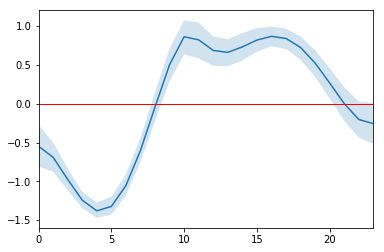

In [139]:
for i in range(4):
    cluster_X = cluster_choice(m_w_h_data,i)
    df_param,length = params_all_fit(cluster_X,"hour")
    plot_fitted(df_param,length,95)
    name = "plot_hour"
    number = "{0:01d}".format(i+1)
    name += number
    name+= ".png"

### 時間毎での消費電力状況
- クラスタ1
    - 日中、電力が消費されている家庭が多いクラスタ
    
- クラスタ2
    - 11時と2０時頃に電力が多く消費されているクラスタ

- クラスタ3
    - 10時~20時頃まで電力が消費されているクラスタ

- クラスタ4
    - 8時~20時頃まで電力が消費されているクラスタ